In [2]:
import pandas as pd
import numpy as np

In [4]:
dataset=pd.read_csv("/content/unnati_phase1_data_revised.csv")

In [ ]:
dataset.head(20)

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,cas_ldw,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,cas_ldw,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,cas_ldw,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,cas_ldw,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,cas_ldw,2022-06-01,05:38:08,12.901594,80.092538,2846,58
5,cas_ldw,2022-06-01,05:38:21,12.903877,80.094272,2846,54
6,cas_ldw,2022-06-01,05:38:41,12.906194,80.095953,2846,58
7,cas_ldw,2022-06-01,05:40:21,12.915664,80.103135,2846,62
8,cas_ldw,2022-06-01,05:41:17,12.918451,80.109058,2846,51
9,cas_ldw,2022-06-01,05:41:25,12.919239,80.110028,2846,47


In [ ]:
dataset.tail(10)

,Alert,Date,Time,Lat,Long,Vehicle,Speed
21315,cas_pcw,2022-08-31,18:04:30,13.059311,80.274246,5339,20
21316,cas_pcw,2022-08-31,18:06:32,13.063161,80.274090,5339,0
21317,cas_hmw,2022-08-31,18:09:34,13.067242,80.270387,5339,25
21318,cas_hmw,2022-08-31,18:10:41,13.067022,80.268574,5339,26
21319,cas_pcw,2022-08-31,18:11:10,13.068362,80.269104,5339,17
21320,cas_pcw,2022-08-31,18:12:29,13.070668,80.265539,5339,30
21321,cas_pcw,2022-08-31,18:13:01,13.071554,80.264616,5339,34
21322,cas_hmw,2022-08-31,18:15:05,13.071181,80.258729,5339,24
21323,cas_pcw,2022-08-31,18:16:35,13.067723,80.255065,5339,23
21324,cas_hmw,2022-08-31,18:19:23,13.065917,80.247777,5339,22


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21325 entries, 0 to 21324
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Alert    21325 non-null  object 
 1   Date     21325 non-null  object 
 2   Time     21325 non-null  object 
 3   Lat      21325 non-null  float64
 4   Long     21325 non-null  float64
 5   Vehicle  21325 non-null  int64  
 6   Speed    21325 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset['Vehicle'].unique()

array([2846,  805, 1995, 5339, 3143])

In [ ]:
max_speed=dataset['Speed'].max()
min_speed=dataset['Speed'].min()
print("Maximum Speed:",max_speed)
print("Minimum Speed:",min_speed)
print("Average Speed:",dataset['Speed'].mean().round(4))
print("Standard Deviation of Speeds:",dataset['Speed'].std().round(4))


maximum_speed_dataset=dataset[dataset['Speed']==max_speed]
minimum_speed_dataset=dataset[dataset['Speed']==min_speed]

#Removing duplication of locations
locations_maxspeed=maximum_speed_dataset[['Lat','Long']].drop_duplicates()
locations_minspeed=minimum_speed_dataset[['Lat','Long']].drop_duplicates()
print("Max speed areas:\n",locations_maxspeed)
print("Min speed areas:\n",locations_minspeed)






Maximum Speed: 65
Minimum Speed: 0
Average Speed: 38.4038
Standard Deviation of Speeds: 16.8476
Max speed areas:
             Lat       Long
4555  12.886609  80.076814
9061  12.907908  80.097278
Min speed areas:
              Lat       Long
38     12.795046  80.020296
57     13.024305  80.228471
124    12.516883  79.887983
134    12.543551  79.904835
198    12.697172  79.972959
...          ...        ...
21099  13.038943  80.246828
21135  13.053098  80.272004
21220  12.923263  80.120547
21227  12.909345  80.099412
21316  13.063161  80.274090

[689 rows x 2 columns]


In [ ]:
pip install opencage

In [ ]:
#Knowing the location addresses
from opencage.geocoder import OpenCageGeocode
api_key = 'f2f6425a67514f128a0806765cff28a2'

# Initialize the geocoder
geocoder = OpenCageGeocode(api_key)

# Replace with the latitude and longitude you want to convert
lat_min = minimum_speed_dataset['Lat'][124]
lng_min = minimum_speed_dataset['Long'][124]

lat_max=maximum_speed_dataset['Lat'][4555]
lng_max=maximum_speed_dataset['Long'][4555]

# Make the geocoding request
result_minspeed = geocoder.reverse_geocode(lat_min, lng_min)
result_maxspeed= geocoder.reverse_geocode(lat_max, lng_max)

#Function for formatted address
def convert(result):
   if result and len(result):
    formatted_address = result[0]['formatted']
    print("Formatted Address:", formatted_address)
   else:
    print("Address not found")

print("Minimum speed area")
convert(result_minspeed)
print("Maximum speed area")
convert(result_maxspeed)


Minimum speed area
Formatted Address: Madurantakam - Vennangupet Road, Chengalpattu District, Maduranthakam - 603306, Tamil Nadu, India
Maximum speed area
Formatted Address: Outer Ring Road, Vandalur, - 603210, Tamil Nadu, India


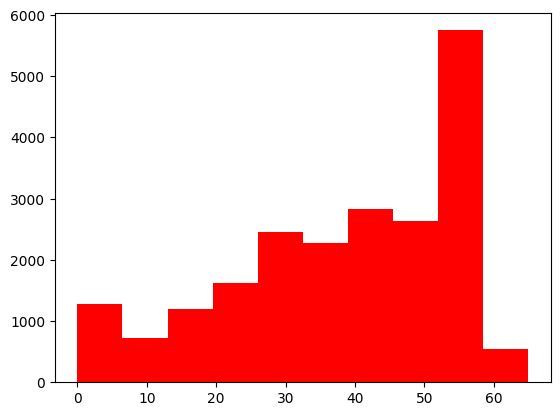

In [ ]:
#Speed Distributions
import matplotlib.pyplot as plt

plt.hist(dataset['Speed'],bins=10,color='r')
plt.show()

In [5]:
#Building a decision tree for predicting alerts
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import warnings

X=dataset[['Lat','Long','Vehicle','Speed']]
Y=dataset['Alert']

#Model Training
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
DecisionTree=DecisionTreeClassifier()
LR=LogisticRegression()
GradientBoost=GradientBoostingClassifier()
DecisionTree.fit(X_train,Y_train)
LR.fit(X_train,Y_train)
GradientBoost.fit(X_train,Y_train)


#Model Testing
predictions_DT=DecisionTree.predict(X_test)
predictions_LR=LR.predict(X_test)
predictions_GB=GradientBoost.predict(X_test)
accuracy_DT=accuracy_score(Y_test,predictions_DT)
accuracy_LR=accuracy_score(Y_test,predictions_LR)
accuracy_GB=accuracy_score(Y_test,predictions_GB)

print("Accuracy score of Decision Tree Classifier:",accuracy_DT.round(3))
print("Accuracy score of Logistic Regression:",accuracy_LR.round(3))
print("Accuracy score of Gradient Boosting Classifier:",accuracy_GB.round(3))




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of Decision Tree Classifier: 0.71
Accuracy score of Logistic Regression: 0.691
Accuracy score of Gradient Boosting Classifier: 0.765


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

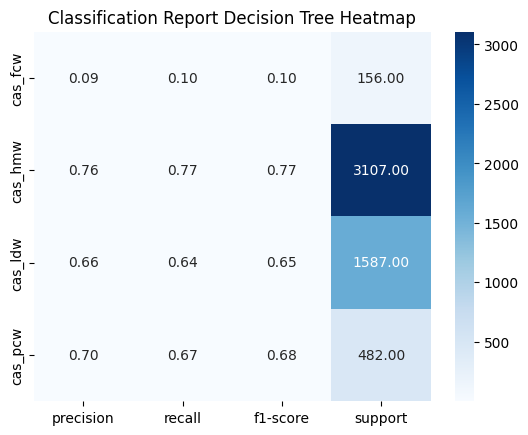

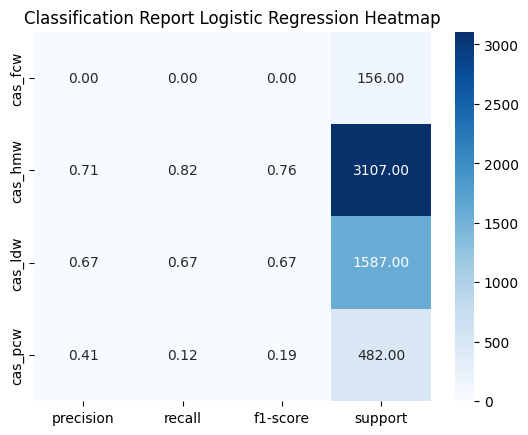

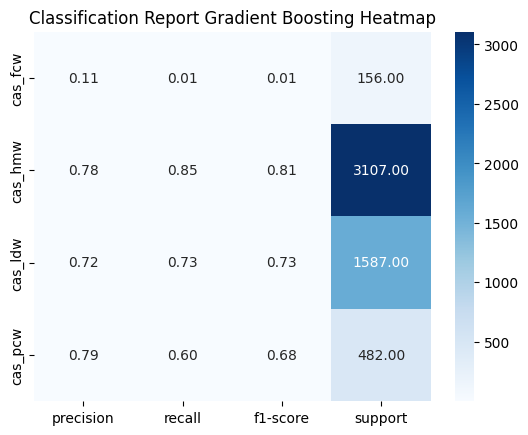

In [ ]:
#Classification Report
import seaborn as sns
classificationreport_DT=classification_report(Y_test,predictions_DT,output_dict=True)
classificationreport_LR=classification_report(Y_test,predictions_LR,output_dict=True)
classificationreport_GB=classification_report(Y_test,predictions_GB,output_dict=True)

report_DT=pd.DataFrame(classificationreport_DT).transpose()
report_LR=pd.DataFrame(classificationreport_LR).transpose()
report_GB=pd.DataFrame(classificationreport_GB).transpose()
plt.title('Classification Report Decision Tree Heatmap')
sns.heatmap(report_DT.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True, cmap='Blues', fmt=".2f")
plt.show()
plt.title('Classification Report Logistic Regression Heatmap')
sns.heatmap(report_LR.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True, cmap='Blues', fmt=".2f")
plt.show()
plt.title('Classification Report Gradient Boosting Heatmap')
sns.heatmap(report_GB.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True, cmap='Blues', fmt=".2f")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


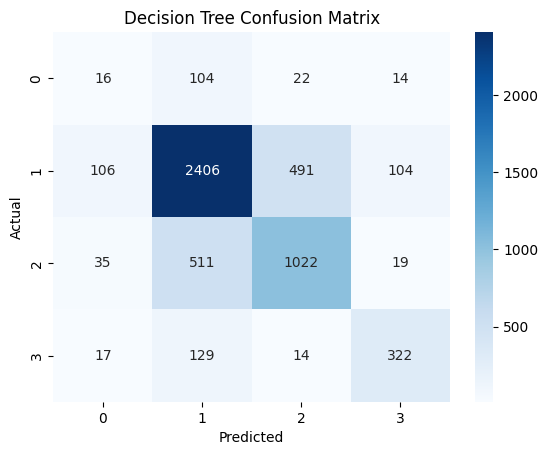

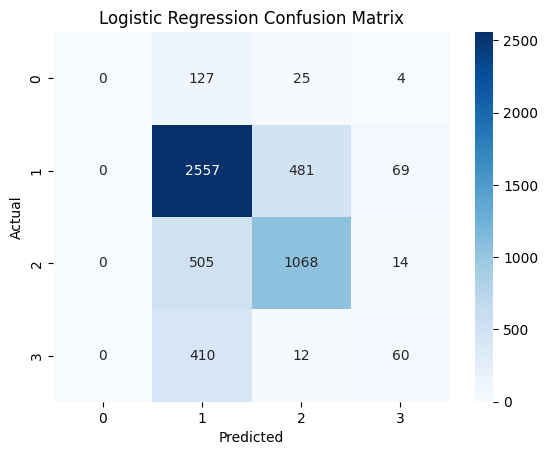

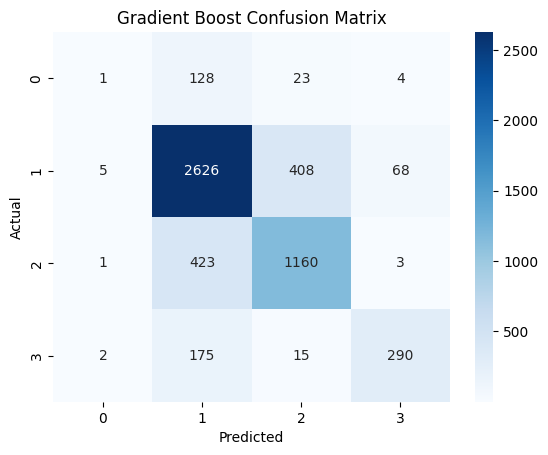

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

cm_DT=confusion_matrix(Y_test,predictions_DT)
sns.heatmap(cm_DT,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

cm_LR=confusion_matrix(Y_test,predictions_LR)
sns.heatmap(cm_LR,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

cm_GB=confusion_matrix(Y_test,predictions_GB)
sns.heatmap(cm_GB,annot=True,cmap='Blues',fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boost Confusion Matrix')
plt.show()

In [ ]:
test_data = {
    'Lat': [12.885432],
    'Long': [80.088765],
    'Vehicle': [2846],
    'Speed': [55]
}
test_df = pd.DataFrame(test_data)
predicted_alert_DF = DecisionTree.predict(test_df)
predicted_alert_LR=LR.predict(test_df)
predicted_alert_GB=DecisionTree.predict(test_df)

print("Predicted Alert Decision Tree:", predicted_alert_DF[0])
print("Predicted Alert Logistic Regression:", predicted_alert_LR[0])
print("Predicted Alert Gradient Boost:", predicted_alert_GB[0])



Predicted Alert Decision Tree: cas_hmw
Predicted Alert Logistic Regression: cas_ldw
Predicted Alert Gradient Boost: cas_hmw
